# Numerical Integration

Numerical integration can be expressed as the following approximate sum:

$$I = \int_a^b f(x) dx \approx \sum_{i=1}^{n} A_i f(x_i)$$

where $A_i$ are the weights associated with the function evaluated at $x_i$. Typically, $n+1$ data points $x_i, i = 0,1,2, \ldots , n$ are selected starting from $a$ upto $b$, and the function is evaluated at each of these ordinates. The weighted sum above is an approximation to the integral we are attemptying to evaluate.

There are two main approaches to carrying out numerical integration. The first approach based on Newton-Cotes formulae divides the interval $a$ to $b$ into a certain number of panels, usually of equal width. If $n$ is the number of panels, then $n+1$ is the number of ordinates, and the function is evaluated at each of these ordinates. For such methods, accuracy usually increases with the number of panels. The second approach is based on Gauss Quadrature. These methods evaluate the function at only a few specified ordinates. Gauss quadrature usually gives accurate results even with only a few function evaluations and can be used even when the limits tend to infinity.

## Newton-Cotes Formulas
Newton-Cotes formulas are based on approximating the given function by a polynomial and computing the integral of the polynomial.

$$I = \int_a^b f(x) dx \approx \int_a^b f_n(x) dx$$

where $f_n(x)$ is a polynomial of the form $f_n(x) = a_0 + a_1 c + a_2 x^2 + \cdots + a_{n-1} x^{n-1} + a_n x^n$.

Trapezoidal Rule is Newton-Cotes formula with $n=1$, which is the equation of a straigt line. Simpson's 1/3 Rule is Newton-Cotes formula with $n=2$, which is a parabola. Trapezoidal rule requires us to determine two unknowns, $a_0$ and $a_1$, thereby requiring two points whereas Simpson's 1/3 rule requires three unknowns $a_0$, $a_1$ and $a_2$, thereby requiring three points. It is easier to obtain the coefficients $a_i$ if the panels are of equal width. The formula for Trapezoidal rule is as follows:

$$I \approx \frac{h}{2} \left[ f(a) + f(a+h) \right]$$

Simpson's 1/3 rule is as follows:

$$I \approx \frac{h}{3} \left[ f(a) + 4 f(a+h) + f(a+2h) \right]$$

## Example
Let us consider the function $f(x) = e^{-x^2}$ and integrate it between the limits $a=0$ to $b=1$, $I = \int_{0}^{1} e^{-x^2} dx$. Let us first use SymPy to calculate the exact answer. In SymPy we must define the symbols that we will use for variables, in this case $x$. We will then define the equation that we wish to integrate, the symbol for the variable and the lower and upper limits of integration. Method **`doit()`** evaluates the integral and the function **`N()`** calculates the numerical value of the integral.

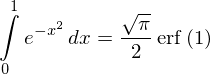

In [4]:
from sympy import *
x = symbols('x')
init_printing()

c = Integral(exp(-x**2), (x, 0, 1))
Eq(c, c.doit())

In [5]:
d = N(c.doit())
print d

0.746824132812427


We now have the value of the integral stored in the object $d$, which we can use later.

## Trapezoidal Rule
<img src="trapezoidal.png" width=500px />

Considering one panel, $(x_i, y_i)$ and $(x_{i+1}, y_{i+1})$, and assuming the function to be varying linearly, we get:
$$ I = \frac{y_i + y_{i+1}}{2} \, h$$
where $h = x_{i+1} - x_i$.

### Composite Trapezoidal Rule
Let the range $a$ to $b$ be divided into $n$ equal panels, each of width $h = \frac{b - a}{n}$. Thus the number of data points is $n+1$ and the ordinate of the points is $x_i = a + (i \cdot h), i = 0, 1, \ldots , n$.

Trapezoidal rule assumes the function to vary linearly between successive data points, and the resulting approximation to the integral is given as:

$$I = \int_a^b f(x) dx \approx \frac{h}{2} \left( y_0 + 2 \sum_{i=1}^{n-2} y_i + y_{n-1} \right)$$

where $y_i = f(x_i)$ is the value of the function evaluated at each ordindate.

Trapezoidal rule with 21 points: 0.999486


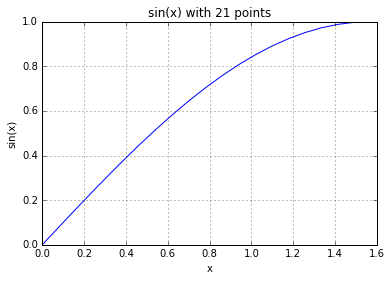

Trapezoidal rule with    6 points: 0.991762
Trapezoidal rule with   11 points: 0.997943
Trapezoidal rule with   21 points: 0.999486
Trapezoidal rule with   51 points: 0.999918
Trapezoidal rule with  101 points: 0.999979
Trapezoidal rule with  501 points: 0.999999
Trapezoidal rule with 1001 points: 1.000000


In [6]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def trapezoidal(y, h):
    n = len(y)
    if n < 2:
        return None
    elif n == 2:
        s = (y[0] + y[1]) * h / 2.0
    else:
        s = (y[0] + y[-1] + 2* np.sum(y[1:-1])) * h / 2.0
    return s

x = np.linspace(0, np.pi/2, 21)
y = np.sin(x)
h = x[1] - x[0]
s1 = trapezoidal(y, h)
print 'Trapezoidal rule with %d points: %f' % (len(x), s1)
plt.plot(x, y)
plt.grid()
plt.title('sin(x) with %d points' % (len(x)))
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

n = [6, 11, 21, 51, 101, 501, 1001]
for nn in n:
    x = np.linspace(0, np.pi/2, nn)
    y = np.sin(x)
    h = x[1] - x[0]
    s = trapezoidal(y, h)
    print 'Trapezoidal rule with %4d points: %f' % (len(x), s)

## Simpson's 1/3 Rule
<img src="simpson.png" width=500px/>

Considering two consecutine panels $(x_i, y_i), (x_{i+1}, y_{i+1}), (x_{i+2}, y_{i+2})$, where $h = x_{i+1} - x_i = x_{i+2} - x_{i+1}$
$$ I = \left( y_i + 4 \, y_{i+1} + y_{i+2} \right) \frac{h}{3} $$

### Composite Simpson's 1/3 Rule
If the interval from $a$ to $b$ is divided into $n$ equal panels each of width $h = \frac{b - a}{n}$ and $n+1$ is the number of ordinates, for Simpson's 1/3 rule, $n$ must be an even number (and $n+1$, obviously must be an odd number).

Simpson's 1/3 rule fits a parabola (polynomial of order two) between three successive points and approximates the integral for the two consecutive panels. To be able to do so, the number of data points must be atleast 3 and the number of panels must be an even number. The composite Simpson's 1/3 rule for $n$ data points, and $n-1$ panels (where $n-1$ must be even) is given below:

$$I = \int_a^b f(x) dx \approx \frac{h}{3} \left( y_0 + 4 \sum_{i=1, 3, 5,\ldots}^{n-2} y_i + 2 \sum_{j=2,4,6,\ldots}^{n-3} y_j \right)$$

Simpson's 1/3 rule with 21 points: 1.000000
Trapezoidal rule with 101 points: 0.999979
Simpson's 1/3 rule with 101 points: 1.000000


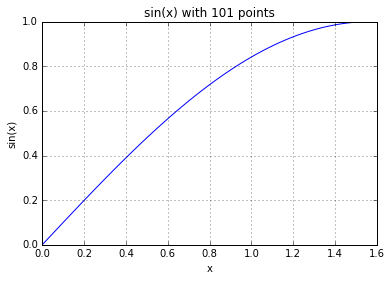

Simpson's rule with    7 points: 1.000026
Simpson's rule with   11 points: 1.000003
Simpson's rule with   21 points: 1.000000
Simpson's rule with   51 points: 1.000000
Simpson's rule with  101 points: 1.000000
Simpson's rule with  501 points: 1.000000
Simpson's rule with 1001 points: 1.000000


In [7]:
def simpson(y, h):
    n = len(y)
    if n < 3:
        return None
    elif n == 3:
        s = y[0] + 4 * y[1] + y[2]
        return s * h / 3.0
    elif n % 2 == 1:
        s = (y[0] + y[-1] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2])) * h / 3.0
    else:
        s = (y[0] + y[-2] + 4 * np.sum(y[1:-2:2]) + 2 * np.sum(y[2:-3:2])) * h / 3.0
        s += (y[-2] + y[-1]) * h / 2.0
    return s

x = np.linspace(0, np.pi/2, 21)
y = np.sin(x)
h = x[1] - x[0]
s2 = simpson(y, h)
print "Simpson's 1/3 rule with %d points: %f" % (len(x), s2)

x = np.linspace(0, np.pi/2, 101)
y = np.sin(x)
h = x[1] - x[0]
s3 = trapezoidal(y, h)
print 'Trapezoidal rule with %d points: %f' % (len(x), s3)
s4 = simpson(y, h)
print "Simpson's 1/3 rule with %d points: %f" % (len(x), s4)

plt.plot(x, y)
plt.grid()
plt.title("sin(x) with %d points" % (len(x)))
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

n = [7, 11, 21, 51, 101, 501, 1001]
for nn in n:
    x = np.linspace(0, np.pi/2, nn)
    y = np.sin(x)
    h = x[1] - x[0]
    s = simpson(y, h)
    print "Simpson's rule with %4d points: %f" % (len(x), s)

It is possible to evaluate an integral exactly using symbolic computing. SymPy is a Python module for symbolic computing and we can find the exact integral as follows:

In [8]:
import sympy
from sympy import init_printing

init_printing()

xx, yy = sympy.symbols('x y')
yy = sympy.sin(xx)
yy
A = sympy.integrate(yy, (xx, 0, pi/2))
print A

1


## Stress Distribution in Concrete as per IS456:2000

As per IS 456:2000, it is assumed that the strain varies linearly across the depth of a cross section. IS 456:2000 also specifies the stress strain relationship for concrete and steel. We can use this information to determine the stress distribution across the depth of a concrete beam, find the stress resultant and its point of action using numerical integration.
$$
\begin{align*}
\frac{\epsilon_c}{x} & = \frac{\epsilon_{cu}}{x_u} \\
\epsilon_c & = \frac{\epsilon_{cu}}{x_u} \, x \\
f_c & = \begin{cases}
0.446 \, f_{ck} \left[ 2 \, \left( \frac{\epsilon_c}{\epsilon_{cy}} \right) - \left( \frac{\epsilon_c}{\epsilon_{cy}} \right)^2 \right] & 0 \leq \epsilon_c \leq \epsilon_{cy} \\
0.446 \, f_{ck} & \epsilon_{cy} < \epsilon_{c} \leq \epsilon_{cu}
\end{cases} \\
C & = b \, \int_{0}^{x_u} f_c \, dx \\
  & = b \, \int_{0}^{x_u} f_c \, dx \\
  M & = \int_{0}^{x_u} f_c \, b \, x \, dx \\
    & = b \, \int_{0}^{x_u} f_c \, x \, dx \\
    \bar{x} & = \frac{M}{C}
\end{align*}
$$

At collapse, strain in concrete is $\epsilon_{cu} = 0.0035$. If we know the depth of neutral axis, we can determine the strain and stress at different locations across the depth. Magnitude of the stress resultant is given by the area of the stress distribution, which is obtained by integrating stress across the depth. Moment of the stress resultant about the neutral axis is obtained by integrating 

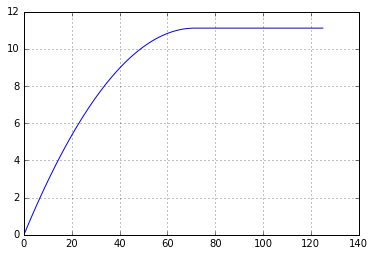

1124.33877315 1124.33862434


In [9]:
def conc_stress(ec, fck, ecy=0.002):
    if ec < ecy:
        ee = ec / ecy
        fc = 2 * ee - ee**2
    else:
        fc = 1.0
    return 4.0 / 9.0 * fck * fc

ecu = 0.0035
xu = 125.0
fck = 25.0
xx = np.linspace(0, xu, 101)
x = xx * ecu / xu
y = np.array([conc_stress(e, fck) for e in x])

plt.plot(xx, y)
plt.grid()
plt.show()

h = xx[1] - xx[0]
C = simpson(y, h)
print C, 68/189*fck*xu

In [10]:
yy = y * xx
M = simpson(yy, h)
xbar = M/C
print xu - xbar, 99/238*xu, (0.416*xu - (xu - xbar)) / (99/238*xu) * 100

51.9957981734 51.9957983193 0.00808108882941


The actual area of stress diagram is given by
$$A = \frac{68}{189} \, f_{ck} \, b \, x_u$$
Assuming $f_{ck}=25, b=1 \text{ and } x_u = 125$, we get $A = \frac{68}{189} \times 25 \times 1 \times 125 = 1124.3386$. 

## Improvements
Accuracy of the integral depends on the step size (that is, number of intervals). More the number of intervals, more accurate is the integral. Theoretically, a numerical method can never give the accurate answer. Trapezoidal rule is simple but not as accurate as Simpson's rule for the same number of data points.

There is a recursive form of trapezoidal rule where we can begin with only one interval and successively keep on doubling the number of intervals. Each time we double the number of intervals, the value of the integral will improve. We can keep checking the change in the integral in subsequent iterations and stop when the change is too small.

## References
1. Chapra, S.C., _Applied Numerical Methods with MATLAB for Engineers and Scientists_, 3ed., McGraw Hill, 2008.
2. Kiusalaas, J., _Numerical Methods in Engineering with Python_, Cambridge University Press, 2005.
3. IS456:2000, Plain and Reinforced Concrete - Code of Practice (Fourth Revision), Bureau of Indian Standards, New Delhi, 2000

## Gauss Quadrature
### Gauss-Legendre Quadrature

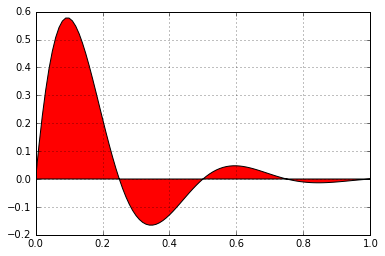

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

t = np.arange(0.0, 1.01, 0.01)
s = np.sin(2*2*np.pi*t)

plt.fill(t, s*np.exp(-5*t), 'r')
plt.grid(True)
plt.show()

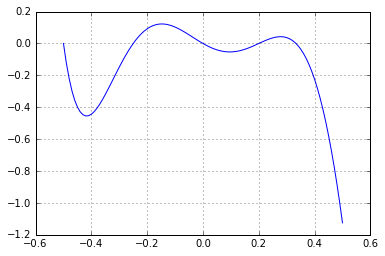

In [13]:
def f(x):
    return 120.0*(x+0.5)*(x+0.25)*x*(x-1.0/3.0)*(x-0.2)*(x-1.0)

x = np.linspace(-0.5, 0.5, 101)
y = f(x)
plt.plot(x, y)
plt.grid()
plt.show()

In [14]:
def horner(a, x):
    n = len(a)
    p = a[-1]
    for k in range(n-2, -1, -1):
        p = a[k] + p * x
    return p

a = np.array([5.0, -1.0, 3.0], dtype=float)
x = np.array([-2, -1, 0, 1, 2], dtype=float)
print a
print horner(a, 1.0)
print horner(a, 2.0)
print horner(a, x)

[ 5. -1.  3.]
7.0
15.0
[ 19.   9.   5.   7.  15.]


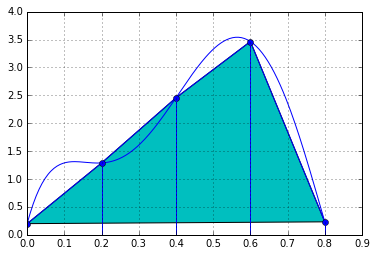

In [15]:
def f(x):
    return 0.2+25*x-200*x**2+675*x**3-900*x**4+400.0*x**5

x = np.linspace(0, 0.8, 201)
y = f(x)
plt.plot(x, y)
plt.grid()
xx = np.linspace(0, 0.8, 5)
yy = f(xx)
plt.plot(xx, yy, 'b')
plt.fill(xx, yy, 'c')
plt.stem(xx, yy, 'b')
plt.show()

   10   0.7462107961317495  -0.0821934879335684
   50   0.7467996071893513  -0.0032840969437502
  100   0.7468180014679697  -0.0008209958042266
   10   0.7468249482544436   0.0001091878382589
   50   0.7468241341203179   0.0000001751270275
  100   0.7468241328941762   0.0000000109462401


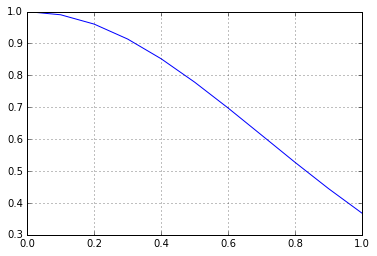

0.746210796132
0.746824948254


In [19]:
def trap1(x, y):
    assert (len(x) == len(y)), 'x and y must have same length'
    m = len(x)
    h = x[1] - x[0]
    return h * (y[0] + 2*sum(y[1:-1]) + y[-1]) / 2.0

for n in [10, 50, 100]:
    x = np.linspace(0, 1, n+1)
    y = f(x)
    s = trap1(x, y)
    print "%5d %20.16f %20.16f" % (n, s, (s-d)/s*100)

def simp1(x, y):
    assert (len(x) == len(y)), 'x and y must have same length'
    m = len(x)
    h = x[1] - x[0]
    return h / 3 * (y[0] + 4*sum(y[1:-1:2])+2*sum(y[2:-2:2])+y[-1])

a = 0.0; b = 1.0; n = 10
for n in [10, 50, 100]:
    x = np.linspace(a, b, n+1)
    y = f(x)
    s = simp1(x, y)
    print "%5d %20.16f %20.16f" % (n, s, (s-d)/s*100)

def f(x):
    return np.exp(-x**2)

x = np.linspace(0, 1, 11)
y = f(x)
plt.plot(x, y)
plt.grid()
plt.show()
print trap1(x, y)
print simp1(x, y)

In [22]:
def gauss_legendre(f, a, b, n=2, debug=False):
    if n == 1:
        t = np.array([0.0])
        A = np.array([2.0])
    elif n == 2:
        t1 = np.sqrt(1.0/3.0)
        t = np.array([-t1, t1])
        A = np.array([1.0, 1.0])
    elif n == 3:
        t1 = np.sqrt(3.0/5.0)
        A1 = 5.0 / 9.0
        A2 = 8.0 / 9.0
        t = np.array([-t1, 0.0, t1])
        A = np.array([A1, A2, A1])
    elif n == 4:
        t1 = np.sqrt(3.0/7 - 2.0/7*np.sqrt(6.0/5))
        t2 = np.sqrt(3.0/7 + 2.0/7*np.sqrt(6.0/5))
        A1 = (18.0 + np.sqrt(30.0)) / 36.0
        A2 = (18.0 - np.sqrt(30.0)) / 36.0
        t = np.array([-t2, -t1, t1, t2])
        A = np.array([A2, A1, A1, A2])
    else:
        t1 = (np.sqrt(5.0 - 2.0 * np.sqrt(10.0/7))) / 3.0
        t2 = (np.sqrt(5.0 + 2.0 * np.sqrt(10.0/7))) / 3.0
        A1 = (322.0 + 13 * np.sqrt(70.0)) / 900.0
        A2 = (322.0 - 13 * np.sqrt(70.0)) / 900.0
        A3 = 128.0 / 225.0
        t = np.array([-t2, -t1, 0.0, t1, t2])
        A = np.array([A2, A1, A3, A1, A2])

    c1 = (b - a) / 2.0
    c2 = (b + a) / 2.0
    x = c1 * t + c2
    y = f(x)

    if debug:
        for tt, xx, yy, AA in zip(t, x, y, A):
            print "%12.6f %12.6f %12.6f %12.6f %12.6f" % (tt, xx, yy, AA, AA*yy)

    return c1 * sum(y*A)

from scipy.special import erf

print 'Correct answer =', np.sqrt(np.pi) * erf(1.0) / 2.0

for n in [1, 2, 3, 4, 5]:
    I = gauss_legendre(f, 0, 1, n)
    print 'n =', n, 'I =', I

Correct answer = 0.746824132812
n = 1 I = 0.778800783071
n = 2 I = 0.746594688283
n = 3 I = 0.746814584191
n = 4 I = 0.746824468131
n = 5 I = 0.746824126766


In [21]:
def trap4(f, a, b, Iold, k):
    '''Recursive Trapezoidal Rule'''
    n = int(2**(k-2))
    h = float(b - a) / n
    x = a + h / 2.0
    s = 0.0
    for i in range(n):
        s += f(x)
        x += h
    Inew = (Iold + h*s) / 2.0
    return Inew

Iold = float(b - a) * (f(a) + f(b)) / 2.0
for k in range(2, 11):
    Inew = trap4(f, 0.0, 1.0, Iold, k)
    print "%5d %21.16f" % (k, Inew)
    Iold = Inew

    2    0.7313702518285630
    3    0.7429840978003812
    4    0.7458656148456952
    5    0.7465845967882216
    6    0.7467642546522943
    7    0.7468091636378279
    8    0.7468203905416179
    9    0.7468231972461524
   10    0.7468238989209475


In [23]:
def f(x):
    return (np.sin(x) / x)**2

print 'Exact I =', 1.41815
for n in [2, 3, 4, 5]:
    print 'n =', n, 'I =', gauss_legendre(f, 0, np.pi, n)

Exact I = 1.41815
n = 2 I = 1.45031180528
n = 3 I = 1.41618742467
n = 4 I = 1.4182150179
n = 5 I = 1.4181502678


In [24]:
def f(x):
    return np.log(x) / (x**2 - 2.0*x + 2.0)

for n in [2, 3, 4, 5]:
    print 'n =', n, 'I =', gauss_legendre(f, 1, np.pi, n)

n = 2 I = 0.606725022862
n = 3 I = 0.581686953277
n = 4 I = 0.584768036213
n = 5 I = 0.58500930387


In [25]:
def f(x):
    return np.sin(x) * np.log(x)

for n in [2, 3, 4, 5]:
    print 'n =', n, 'I =', gauss_legendre(f, 0, np.pi, n)

n = 2 I = 0.481728993916
n = 3 I = 0.626557170805
n = 4 I = 0.634859692783
n = 5 I = 0.638388665011
